<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-2c:-Regression-(Python)" data-toc-modified-id="Chapter-2c:-Regression-(Python)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chapter 2c: Regression (Python)</a></span><ul class="toc-item"><li><span><a href="#1.-Linear-regression" data-toc-modified-id="1.-Linear-regression-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1. Linear regression</a></span><ul class="toc-item"><li><span><a href="#Method-of-least-squares" data-toc-modified-id="Method-of-least-squares-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Method of least squares</a></span></li></ul></li><li><span><a href="#2.-Non-linear-regression" data-toc-modified-id="2.-Non-linear-regression-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>2. Non-linear regression</a></span><ul class="toc-item"><li><span><a href="#Basis-functions" data-toc-modified-id="Basis-functions-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Basis functions</a></span></li></ul></li><li><span><a href="#3.-Regularization" data-toc-modified-id="3.-Regularization-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>3. Regularization</a></span><ul class="toc-item"><li><span><a href="#3.1.-Concept-of-overfitting" data-toc-modified-id="3.1.-Concept-of-overfitting-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>3.1. Concept of overfitting</a></span></li><li><span><a href="#3.2.-Ridge-regression-($L_2$-regularization)" data-toc-modified-id="3.2.-Ridge-regression-($L_2$-regularization)-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>3.2. Ridge regression ($L_2$ regularization)</a></span></li><li><span><a href="#3.3.-Lasso-regression-($L_1$-regularization)" data-toc-modified-id="3.3.-Lasso-regression-($L_1$-regularization)-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>3.3. Lasso regression ($L_1$ regularization)</a></span></li></ul></li><li><span><a href="#4.-Model-validation" data-toc-modified-id="4.-Model-validation-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>4. Model validation</a></span><ul class="toc-item"><li><span><a href="#4.1.-Bias-variance-trade-off" data-toc-modified-id="4.1.-Bias-variance-trade-off-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>4.1. Bias-variance trade-off</a></span></li><li><span><a href="#4.2.-Data-split" data-toc-modified-id="4.2.-Data-split-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>4.2. Data split</a></span></li><li><span><a href="#4.3.-Validation-curve" data-toc-modified-id="4.3.-Validation-curve-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>4.3. Validation curve</a></span></li><li><span><a href="#4.4.-Learning-curve" data-toc-modified-id="4.4.-Learning-curve-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>4.4. Learning curve</a></span></li><li><span><a href="#4.5.-Grid-search" data-toc-modified-id="4.5.-Grid-search-1.4.5"><span class="toc-item-num">1.4.5&nbsp;&nbsp;</span>4.5. Grid search</a></span></li><li><span><a href="#4.6.-Performance-metrics" data-toc-modified-id="4.6.-Performance-metrics-1.4.6"><span class="toc-item-num">1.4.6&nbsp;&nbsp;</span>4.6. Performance metrics</a></span></li></ul></li><li><span><a href="#5.-References" data-toc-modified-id="5.-References-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>5. References</a></span></li></ul></li></ul></div>

# Chapter 2c: Regression (Python)

## 1. Linear regression

Linear regression is one of the simplest statistical methods available, and it is at the basis of many complex machine learning techniques. A modification of the linear regression permits to do non-linear regression and machine learning methods such as Lasso and Ridge, as we will see below. But other modifications lead to classifiers, such as a logistic regression and neural networks, as we will discover in future lectures.

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.model_selection import validation_curve, learning_curve, GridSearchCV

import sklearn.metrics as metrics

The most familiar linear regression is a straight-line fit to data, which takes the usual form $y = ax + b$. Let us however directly use the machine learning notation $y = w x + b$ with $w$ the weight and $b$ the bias. Next, multiple linear regression takes the form $y = w_0 + w_1 x_1 + w_2 x_2 + \cdots$ (the bias $b$ can be conveniently written as weight $w_0$ with $x_0 = 1$) or in tensorial form, $y = w^T X$. We will first define some data that follow a linear relationship. Note already that we add Gaussian noise. This will become important when we describe the linear regression probabilistically.

Model slope:     1.9739905362489498
Model intercept: -5.023486439969841


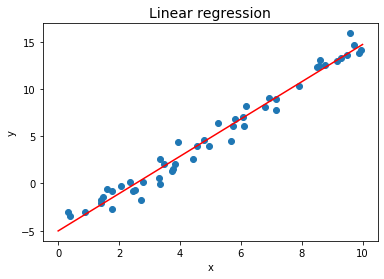

In [122]:
w = 2
b = -5

rng = np.random.RandomState()
x = 10 * rng.rand(50)
y = w * x + b + rng.randn(50)

# linear regression
model = LinearRegression(fit_intercept = True)
model.fit(x[:, np.newaxis], y) #np.newaxis: add one dimension 

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear regression', size = 14);

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

We directly used the `LinearRegression` function from `sklearn`. However it is important to understand how the slope $w$ (or weight) and intercept $w_0$ (or bias) were obtained.

### Method of least squares

The method of least squares is a standard approach in regression analysis to approximate the solution by minimizing the sum of the squares of the residuals $L = \sum_i (y_i - (w x_i + b))^2$ (a loss function). Minimization of the loss is central in machine learning and often requires numerical methods (see `chap2e.ipynb`). For a linear regression (and some non-linear regressions), there is a closed-form solution:
$$
\hat{w} = \left( X^T X \right)^{-1} X^T y
$$
This is in fact the maximum likelihood estimate (MLE) for a linear regression, when defined probabilistically as the normal distribution $P(y|x,\theta) = \mathcal{N}(y|\mu(x), \sigma^2(x))$ with mean $\mu = wx+b$, the variance assumed constant $\sigma^2(x) = \sigma^2$, and the model parameters $\theta = (w,b,\sigma^2)$. Demonstration of the general method of least squares is outside the scope of this course. However, it is important to notice some of the underlying assumptions: all variables are independent, the noise (or error term) is assumed Gaussian and the variance is constant (i.e. homoscedasticity, or no heteroscedasticity). Let us estimate $w$ and $b$ ourselves with the method of least squares. In our simple case, we have
$$
\hat{w} = \frac{n \sum (x_i y_i) - \sum x_i \sum y_i}{n \sum x_i^2 - \left( \sum x_i \right)^2} \mbox{ and } \hat{b} = \frac{\sum y_i - w \sum x_i}{n}
$$
with $n$ the number of data points.

**EXERCISE 1:** Calculate the optimal model parameters directly from the closed-form solution using functions `len()` for vector length, `pow(x,2)` to square $x$ (or `**2`), and `np.sum()`.

In [125]:
n = len(x)
w_lsq = (n*sum(x*y)-sum(x)*sum(y))/(n*sum(x**2)-(sum(x))**2)
b_lsq = (1/n)*(sum(y)- model.coef_[0]*sum(x))

w_lsq,b_lsq

print("Model slope:    ", w_lsq)
print("Model intercept:", b_lsq)

Model slope:     1.9739905362489505
Model intercept: -5.023486439969842


_WARNING:_ The limits of the method of least squares become evident on data that do not respect the underlying assumptions of the model. Geo-data may not have an error term normally distributed, some variables may be correlated, we may observe heteroscedasticity, _etc._, so one should be cautious when using the method of least squares. To illustrate this, we show below _Anscombe's quartet_, which comprises 4 data sets that have nearly identical simple descriptive statistics (including a linear regression line $y = 3 + 0.5 x$), and yet have very different distributions and appear very different when graphed. Each dataset consists of eleven (x,y) points (Anscombe, 1973). 

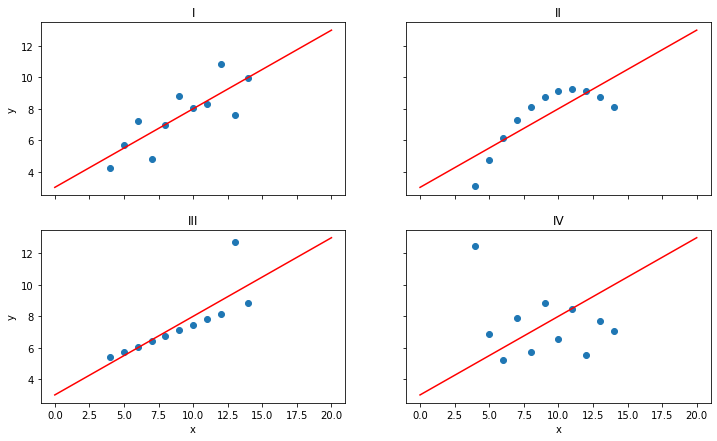

In [126]:
# Anscombe's quartet
Anscombe_x = [10., 8., 13., 9., 11., 14., 6., 4., 12., 7., 5.]
Anscombe_yI = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
Anscombe_yII = [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74]
Anscombe_yIII = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
Anscombe_xIV = [8., 8., 8., 8., 8., 8., 8., 19., 8., 8., 8.]
Anscombe_yIV = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]

# linear regression
xfit = np.linspace(0, 20, 1000)
modelI = LinearRegression(fit_intercept = True)
modelI.fit(np.array(Anscombe_x)[:, np.newaxis], Anscombe_yI)
modelII = LinearRegression(fit_intercept = True)
modelII.fit(np.array(Anscombe_x)[:, np.newaxis], Anscombe_yII)
modelIII = LinearRegression(fit_intercept = True)
modelIII.fit(np.array(Anscombe_x)[:, np.newaxis], Anscombe_yIII)
modelIV = LinearRegression(fit_intercept = True)
modelIV.fit(np.array(Anscombe_xIV)[:, np.newaxis], Anscombe_yIV)

fig, axs = plt.subplots(2,2)
fig.set_figheight(7)
fig.set_figwidth(12)
axs[0, 0].scatter(Anscombe_x, Anscombe_yI)
axs[0, 0].plot(xfit, modelI.predict(xfit[:, np.newaxis]), 'r')
axs[0, 0].set_title('I')
axs[0, 1].scatter(Anscombe_x, Anscombe_yII)
axs[0, 1].plot(xfit, modelII.predict(xfit[:, np.newaxis]), 'r')
axs[0, 1].set_title('II')
axs[1, 0].scatter(Anscombe_x, Anscombe_yIII)
axs[1, 0].plot(xfit, modelIII.predict(xfit[:, np.newaxis]), 'r')
axs[1, 0].set_title('III')
axs[1, 1].scatter(Anscombe_x, Anscombe_yIV)
axs[1, 1].plot(xfit, modelIV.predict(xfit[:, np.newaxis]), 'r')
axs[1, 1].set_title('IV')

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')
    ax.label_outer()    # Hide x labels and tick labels for top plots and y ticks for right plots

## 2. Non-linear regression

### Basis functions

One can adapt linear regression to nonlinear relationships between variables by transforming the data according to _basis functions_. One common example is polynomial basis functions for _polynomial regression_:
$$
y = w_0 + w_1 x + w_2 x^2 + w_3 x^3 + \cdots
$$
We show below that a linear model, through the use of 7th-order polynomial basis functions, can provide a good fit to a non-linear data set (sine wave).

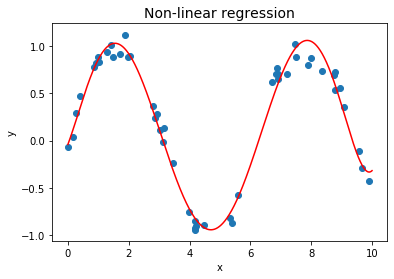

In [128]:
poly_model = make_pipeline(PolynomialFeatures(6),
                           LinearRegression())

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Non-linear regression', size = 14);

Many other basis functions can be applied, which lead to other machine learning methods, as we will see throughout this course. Another example to be mentioned here is _Gaussian basis functions_ (below with 6 of them applied to the same data set).

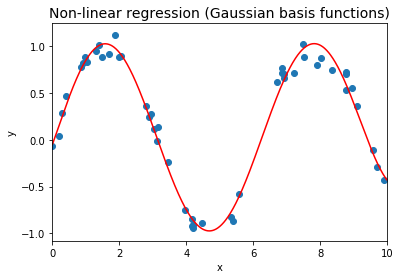

In [129]:
# from https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
     
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(6),
                            LinearRegression())

gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, 'r')
plt.xlim(0, 10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Non-linear regression (Gaussian basis functions)', size = 14);

## 3. Regularization

### 3.1. Concept of overfitting

The introduction of basis functions into our linear regression makes the model much more flexible, but it also can very quickly lead to over-fitting, as shown below when using 30 Gaussian basis functions.

array([   2443.36433958,   -9176.47091013,   21599.39908922,
        -38284.48106305,   56860.02947593,  -72841.79133039,
         81978.12944583,  -79115.41685266,   60434.04301172,
        -22167.90085436,  -37267.5716455 ,  118483.14093868,
       -218731.22080051,  332900.47200222, -451399.48253608,
        562296.26410379, -651353.87498774,  706669.69422693,
       -720130.17276534,  691269.56710604, -625660.84763014,
        534551.47878874, -430163.04319554,  324859.32508414,
       -227866.99142123,  146329.62157818,  -83477.46056404,
         40487.96530944,  -15033.04547941,    3462.24243548])

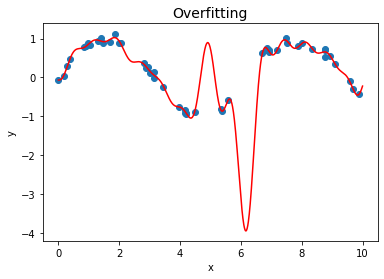

In [130]:
gauss_model = make_pipeline(GaussianFeatures(30),
                            LinearRegression())

gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Overfitting', size = 14);

gauss_model.steps[1][1].coef_

Overfitting can be limited by penalizing large values of the model parameters. Such a penalty is known as regularization. Two main strategies are possibles, which are known as the machine learning techniques: _Ridge regression_ and _Lasso regression_

### 3.2. Ridge regression ($L_2$ regularization)

Ridge regression or $L_2$ regularization proceeds by penalizing the sum of squares (2-norms) of the model coefficients; in this case, the penalty on the model fit would be
$$
L = \alpha \sum_{n=1}^N \theta_n^2
$$
with $\alpha$ a free parameter that controls the strength of the penalty. Below, we can see that while keeping the 30 Gaussian basis functions, Ridge regression decreases the weight of many model coefficients.

array([-0.21105794,  0.10862732,  0.31824548,  0.31676161,  0.2418113 ,
        0.24003021,  0.27210133,  0.23947825,  0.15675484,  0.08094844,
       -0.00307864, -0.11134067, -0.18560261, -0.19090305, -0.18482812,
       -0.20657632, -0.19638464, -0.09387141,  0.06369053,  0.1945448 ,
        0.26527119,  0.28056559,  0.23593141,  0.16159984,  0.15753808,
        0.26372747,  0.34134295,  0.21541902, -0.09008851, -0.36548691])

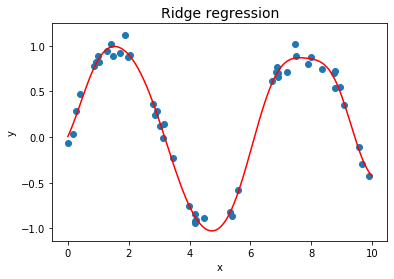

In [131]:
ridge_model = make_pipeline(GaussianFeatures(30), Ridge(alpha = 0.1))
ridge_model.fit(x[:, np.newaxis], y)
yfit = ridge_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ridge regression', size = 14);

ridge_model.steps[1][1].coef_

### 3.3. Lasso regression ($L_1$ regularization)

Another very common type of regularization is known as _Lasso regression_, and involves penalizing the sum of absolute values (1-norms) of regression coefficients:
$$
L = \alpha \sum_{n=1}^N |\theta_n|
$$
Though this is conceptually very similar to ridge regression, the results can differ surprisingly.

**EXERCISE 2:** Run and plot a Lasso model by yourself. Use the Ridge code cell as template and replace `Ridge(alpha = .1)` by `Lasso(alpha = .001)`. What is the main difference with Ridge?

/home/andrea/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021358158704898322, tolerance: 0.002065280097246271
  positive)


array([-0.06286233, -0.        ,  0.        ,  0.86295131,  0.        ,
        0.        ,  0.48088516,  0.36741894,  0.        ,  0.        ,
       -0.        , -0.        , -0.07936308, -0.45992104, -0.        ,
       -0.46876751, -0.        , -0.        ,  0.        ,  0.        ,
        0.05224847,  0.88549199,  0.        ,  0.        ,  0.        ,
        0.69057395,  0.21471793,  0.        , -0.        , -0.3297924 ])

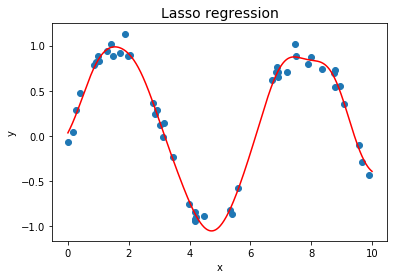

In [132]:
ridge_model = make_pipeline(GaussianFeatures(30), Lasso(alpha = .001))
ridge_model.fit(x[:, np.newaxis], y)
yfit = ridge_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lasso regression', size = 14);

ridge_model.steps[1][1].coef_

_YOUR ANSWER HERE_

## 4. Model validation

We have by now already applied several supervised machine learning models: simple linear regression, nonlinear regression, ridge and lasso! It is now time to move to the next step in machine learning, model validation.

So far, we used the full data set to fit a model, which can lead to overfitting. Machine learning requires spliting the data into a training set for model calibration and an independent test set for model prediction. To validate the model based on different tests, such as investigate the impact of hyperparameter changes, the training set can be further splitted to include a validation set. Different approaches are possible.

### 4.1. Bias-variance trade-off

Let us first talk of the central problem of machine learning, the bias-variance trade-off. Fundamentally, the question of "the best model" is about finding a compromise in the trade-off between bias and variance. Consider the following figure, which presents two regression fits to the same dataset:

In [133]:
def make_data(N, err=0.8, rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

In [134]:
X, y = make_data(40)

def make_data(N, err=0.8, rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

xfit = np.linspace(-0.1, 1.0, 1000)[:, None]
poly1_model  = make_pipeline(PolynomialFeatures(1),
                           LinearRegression()).fit(X, y)

poly20_model = make_pipeline(PolynomialFeatures(20),
                           LinearRegression()).fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].scatter(X.ravel(), y, s=40)
ax[0].plot(xfit.ravel(), poly1_model.predict(xfit), 'r')
ax[0].axis([-0.1, 1.0, -2, 14])
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('High-bias model: Underfits the data', size=14)

ax[1].scatter(X.ravel(), y, s=40)
ax[1].plot(xfit.ravel(), poly20_model.predict(xfit), 'r')
ax[1].axis([-0.1, 1.0, -2, 14])
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title('High-variance model: Overfits the data', size=14);

The simple model (linear regression) is too simple to describe the data while the complex model (20th order polynomial) appears to describe most of the fluctuations of the data. However, part of those fluctuations are just due to noise.

Adding more data sampled from the same process in green (see below) shows that the complex model is really not that good after all (i.e. it overfits the data). The "not that good" impression can be quantified with some _performance metrics_. Here we introduce the $R^2$ score, or _coefficient of determination_, which measures how well a model performs relative to a simple mean of the target values. $R^2=1$ indicates a perfect match, $R^2=0$ indicates the model does no better than simply taking the mean of the data, and negative values mean even worse models (see later for more scoring metrics).

Poly1 training score: R squared = 0.7334642112704657
Poly1 validation score: R squared = 0.5166615658807423
Poly20 training score: R squared = 0.9733950107000893
Poly20 validation score: R squared = -88.69974777247413


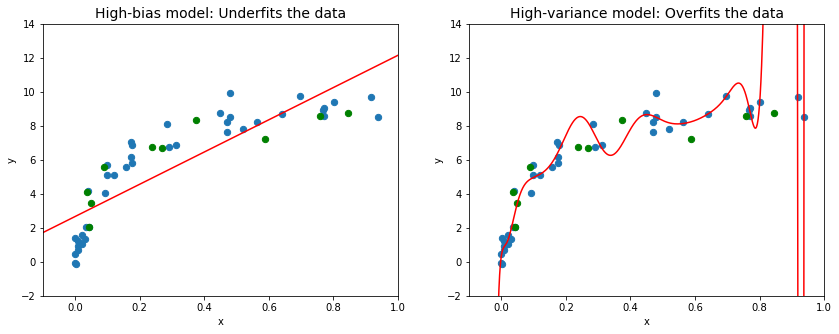

In [136]:
X2, y2 = make_data(10, rseed = 5)
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].scatter(X.ravel(), y, s=40)
ax[0].scatter(X2.ravel(), y2, s=40, color='g')
ax[0].plot(xfit.ravel(), poly1_model.predict(xfit), 'r')
ax[0].axis([-0.1, 1.0, -2, 14])
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('High-bias model: Underfits the data', size=14)

ax[1].scatter(X.ravel(), y, s=40)
ax[1].scatter(X2.ravel(), y2, s=40, color='g')
ax[1].plot(xfit.ravel(), poly20_model.predict(xfit), 'r')
ax[1].axis([-0.1, 1.0, -2, 14])
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title('High-variance model: Overfits the data', size=14);

print("Poly1 training score: R squared =", poly1_model.score(X, y))
print("Poly1 validation score: R squared =", poly1_model.score(X2, y2))
print("Poly20 training score: R squared =", poly20_model.score(X, y))
print("Poly20 validation score: R squared =", poly20_model.score(X2, y2))

### 4.2. Data split

We just discovered the importance of validating the model on independent data (in green in the previous plots). This requires some strategy.

An obvious data split could be 50% training and 50% validation. However, half of the data is then lost for the training. A common strategy is to do _cross-validation_ instead, that is, to do a sequence of fits where each subset of the data is used both as a training set and as a validation set. This particular form of cross-validation is a two-fold cross-validation—that is, one in which we have split the data into two sets and used each in turn as a validation set. We can expand on this idea to use even more trials, and more folds in the data, which is called _$K$-fold cross-validation_ (see Figure). The extreme case would then be to have the number of folds equal the number of data points: that is, we train on all points but one in each trial. This type of cross-validation is known as _leave-one-out cross validation_.

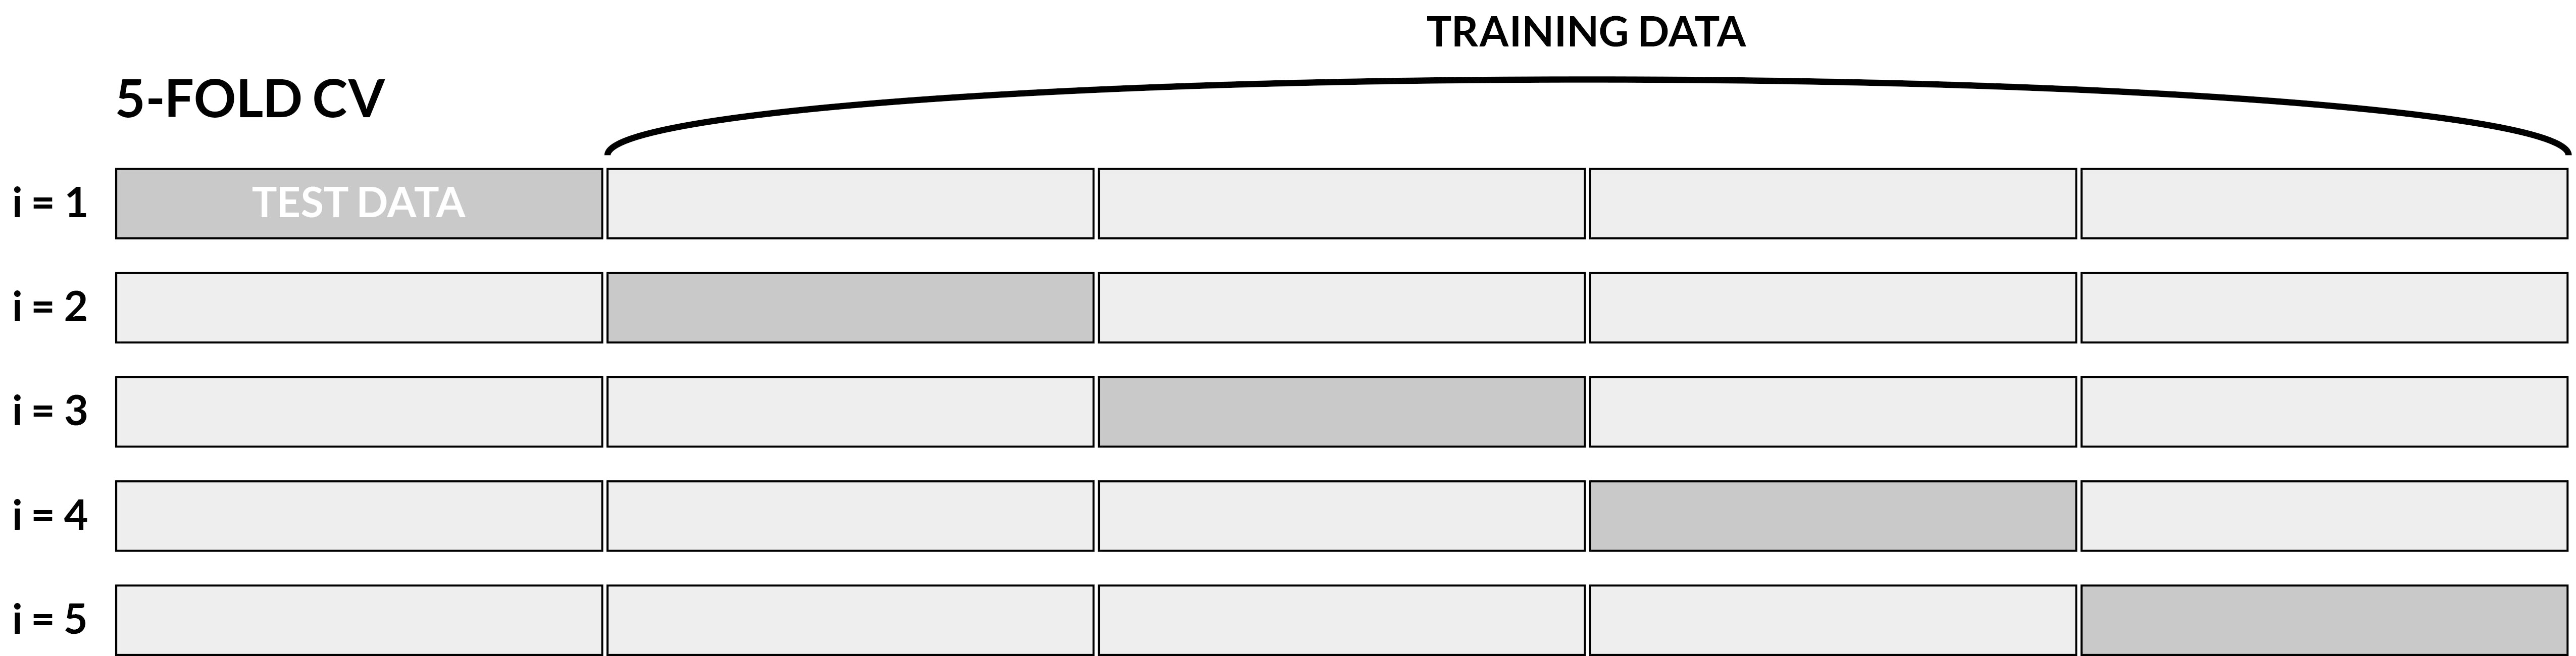

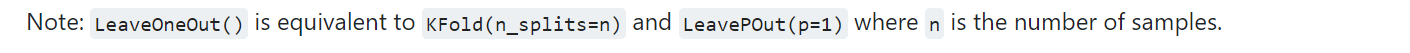

In [149]:
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state = 0, train_size = 0.5)
# 5-fold cross-validation
cross_val_score(model, X, y, cv = 5)
# Leave one out cross-validation
# Very costly
#cross_val_score(model, X, y, cv=LeaveOneOut(len(X)))

array([0.5895883 , 0.74291232, 0.44785594, 0.72458972, 0.64508379])

### 4.3. Validation curve

Since validation sets are used to test different parameter hyperparameterizations, let us use cross-validation to explore the best number of polynomial basis functions for the data previously defined. First let us visualise how models of increasing complexity behave:

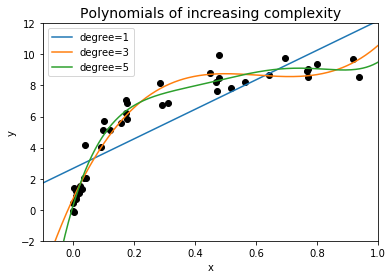

In [150]:
def PolynomialRegression(degree = 2):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression())

xfit = np.linspace(-0.1, 1.0, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()

for degree in [1, 3, 5]:
    yfit = PolynomialRegression(degree).fit(X, y).predict(xfit)
    plt.plot(xfit.ravel(), yfit, label='degree={0}'.format(degree))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomials of increasing complexity', size = 14)
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

Then, we want to answer the questions: what degree of polynomial provides a suitable trade-off between bias (under-fitting) and variance (over-fitting)? We can visualize it on a so-called _validation curve_:

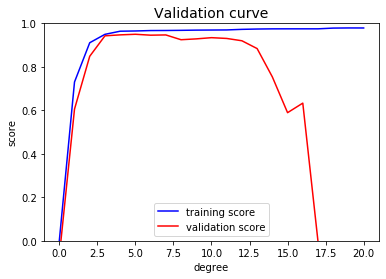

In [191]:
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv = 7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.title('Validation curve', size = 14)
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

The optimal choice is the case for which the validation score is maximal, which here corresponds to 3 polynomial basis functions.

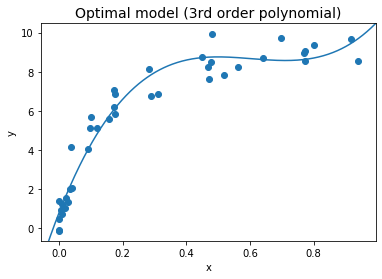

In [152]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
yfit = PolynomialRegression(3).fit(X, y).predict(xfit)
plt.plot(xfit.ravel(), yfit)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Optimal model (3rd order polynomial)', size = 14)
plt.axis(lim);

### 4.4. Learning curve

One important aspect of model complexity is that the optimal model will generally depend on the size of the training data. For example, let's generate a new dataset with a factor of five more points:

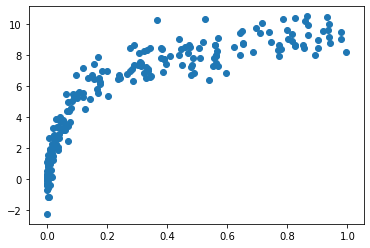

In [153]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

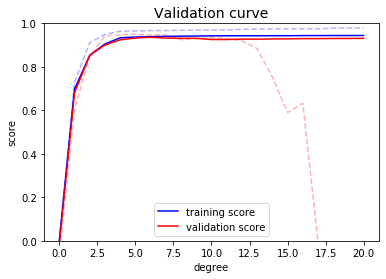

In [192]:
degree = np.arange(0, 21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                          'polynomialfeatures__degree', degree, cv = 7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')

# Previous model: less samples
plt.plot(degree, np.median(train_score, 1), color='blue', linestyle='dashed', alpha=0.3)
plt.plot(degree, np.median(val_score, 1), color='red', linestyle='dashed', alpha=0.3)
plt.title('Validation curve', size = 14)
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

It is clear from the validation curve that the larger dataset can support a much more complicated model: the peak here is probably around a degree of 6, but even a degree-20 model is not seriously over-fitting the data—the validation and training scores remain very close. Thus we see that the behavior of the validation curve has not one but two important inputs:  
**1. the model complexity and**  
**2. the number of training points.**  

It is often useful to explore the behavior of the model as a function of the number of training points, which we can do by using increasingly larger subsets of the data to fit our model. A plot of the training/validation score with respect to the size of the training set is known as a __learning curve__.

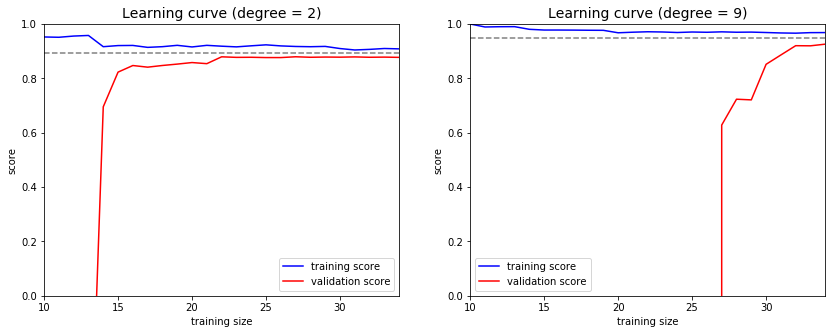

In [175]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv = 7,
                                         train_sizes = np.linspace(0.3, 1, 25))# Relative poportion of traning data
    
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')
    
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('Learning curve (degree = {0})'.format(degree), size=14)
    ax[i].legend(loc='best');

This is a valuable diagnostic, because it gives us a visual depiction of how a selected model responds to increasing training data. In particular, when the learning curve has already converged (i.e., when the training and validation curves are already close to each other) adding more training data will not significantly improve the fit! This situation is seen in the left panel, with the learning curve for the degree-2 model.

The only way to increase the converged score is to use a different (usually more complex) model. We see this in the right panel: by moving to a much more complex model, we increase the score of convergence (indicated by the dashed line), but at the expense of higher model variance (indicated by the difference between the training and validation scores). If we were to add even more data points, the learning curve for the more complicated model would eventually converge. This illustrates the increasing role of Big Data in machine learning.

### 4.5. Grid search

In practice, models generally have more than one hyperparameter to tune, and thus plots of validation and learning curves change from lines to multi-dimensional surfaces. In these cases, such visualizations are difficult and we would rather simply find the particular model that maximizes the validation score. This can be done as follows:

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 5}

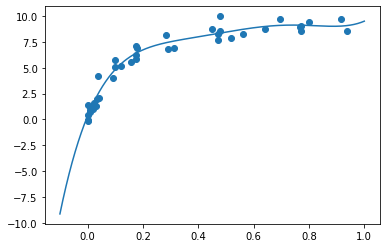

In [178]:
param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=10)
grid.fit(X, y)

model = grid.best_estimator_
plt.scatter(X.ravel(), y)
yfit = model.fit(X, y).predict(xfit)
plt.plot(xfit.ravel(), yfit);

grid.best_params_

### 4.6. Performance metrics

The quality of a regression model can be estimated from various metrics function of the residual $\epsilon_i = y_i - \hat{y_i}$

* $R^2$ score: $R^2 = 1 - \frac{\sum_{i=1}^N \epsilon_i^2}{\sum_{i=1}^N (y_i - \bar{y})^2}$

* Mean absolute error (MAE): $MAE = \frac{\sum_{i=1}^N | \epsilon_i |}{N}$

* Mean squared error (MSE): $MSE = \frac{\sum_{i=1}^N | \epsilon_i^2 |}{N}$

* Root mean squared error (RMSE): $RMSE = \sqrt{ \frac{\sum_{i=1}^N | \epsilon_i^2 |}{N} }$


**EXERCISE 3:** Calculate the metrics given above for the previous observations $y$ for the best model obtained from grid search.

In [185]:
yhat = model.fit(X,y).predict(X)
eps = y - yhat
r2 = 1- (sum(eps**2))/sum((y-np.mean(y))**2)
mae = sum(np.abs(eps))/len(y)
mse = sum(eps**2)/len(y)
rmse = np.sqrt(sum(eps**2)/len(y))

print("Results by manual calculation:")
print("R-Squared:", r2)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

Results by manual calculation:
R-Squared: 0.964483819943008
MAE: 0.512769638634385
MSE: 0.38408275679154796
RMSE: 0.6197441058949636


We could use Python functions instead from `sklearn.metrics`:

In [186]:
r2_sk = metrics.r2_score(y, yhat)
mae_sk = metrics.mean_absolute_error(y, yhat)
mse_sk = metrics.mean_squared_error(y, yhat)
rmse_sk = np.sqrt(mse)

print("Results of sklearn.metrics:")
print("R-Squared:", r2_sk)
print("MAE:", mae_sk)
print("MSE:", mse_sk)
print("RMSE:", rmse_sk)

Results of sklearn.metrics:
R-Squared: 0.964483819943008
MAE: 0.5127696386343852
MSE: 0.38408275679154785
RMSE: 0.6197441058949636


**EXERCISE 4:** The y-axis of the validation and learning curves was named 'score', without further detail. Based on the definition of the metrics listed above, what metric was most likely to be used to compute that score?

$R^2$

## 5. References

* Anscombe (1973), Graphs in Statistical Analysis, The American Statistician, 27 (1), 17-21